In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv("mall customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df = df.drop('CustomerID', axis=1)

In [6]:
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [7]:
df.shape

(200, 4)

In [8]:
df = df.rename(columns = {'Gender':'gender', 'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':'score'})

In [9]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df1 = df.copy()
df2 = df.copy()

In [11]:
df.shape

(200, 4)

In [12]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [13]:
import matplotlib.pyplot as plt

# Viz

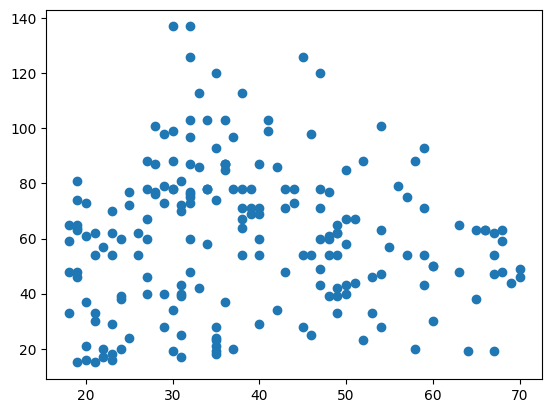

In [14]:
plt.scatter(df.age , df.income)

Text(0.5, 1.0, 'Age and Score plot')

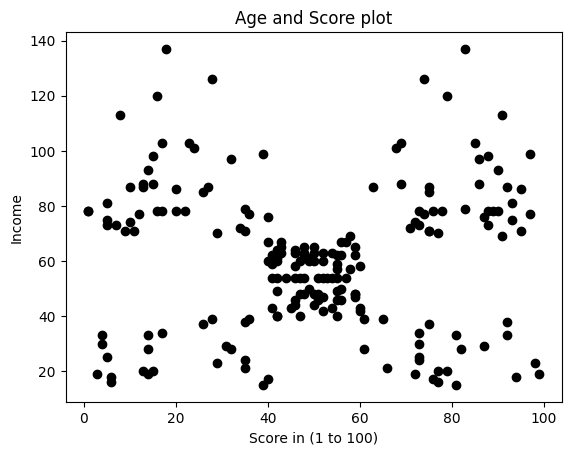

In [15]:
plt.scatter(df.score , df.income, color='black')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

# pairplot

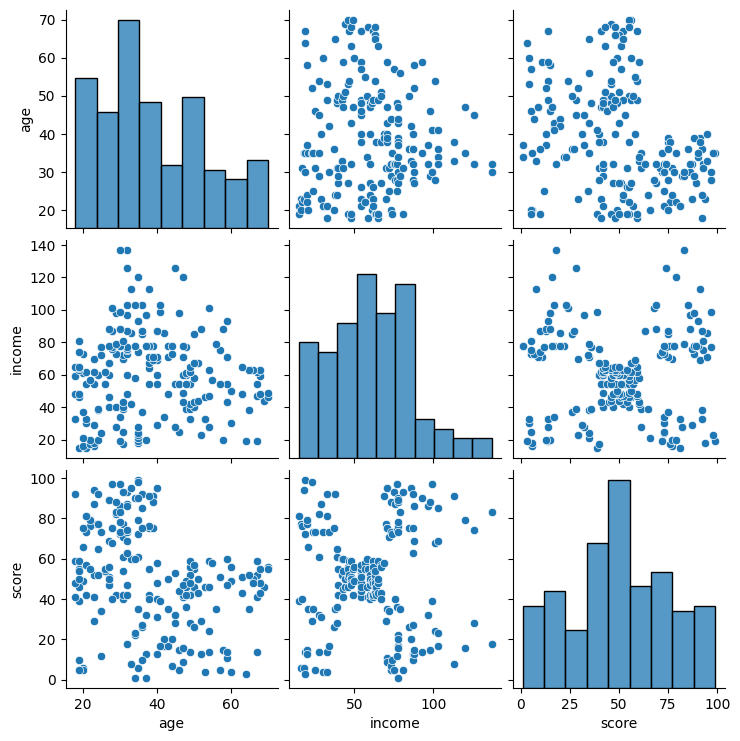

In [16]:
sns.pairplot(df[['age','income','score']])

Text(0.5, 1.0, 'Age and Score plot')

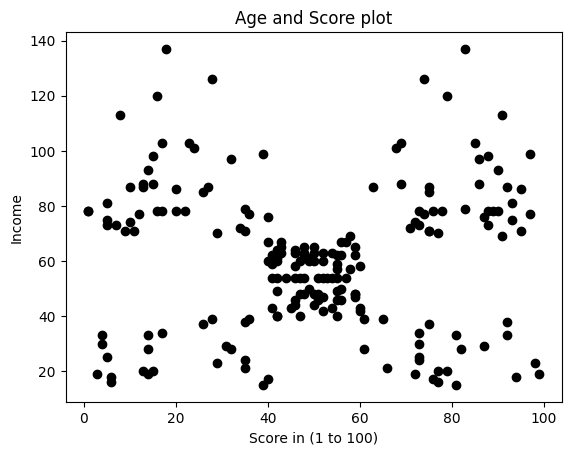

In [17]:
#income and score
plt.scatter(df.score , df.income, color='black')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

# K-Means Cluster

In [18]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

In [20]:
km = KMeans(n_clusters=8) # creating kmeans object

In [21]:
km.fit(df[['score', 'income']]) #fit() -> training the ml model

C:\Users\IT BD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\IT BD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans()

In [22]:
df.head()

,gender,age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [23]:
df['new_cluster1'] = km.predict(df[['score', 'income']])

In [24]:
df.head()

,gender,age,income,score,new_cluster1
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


# viz

In [25]:
df0 = df[df.new_cluster1 == 0]

In [26]:
df0.head()

,gender,age,income,score,new_cluster1
89,Female,50,58,46,0
90,Female,68,59,55,0
91,Male,18,59,41,0
92,Male,48,60,49,0
93,Female,40,60,40,0


In [27]:
df0.shape

(40, 5)

Text(0.5, 1.0, 'Age and Score plot')

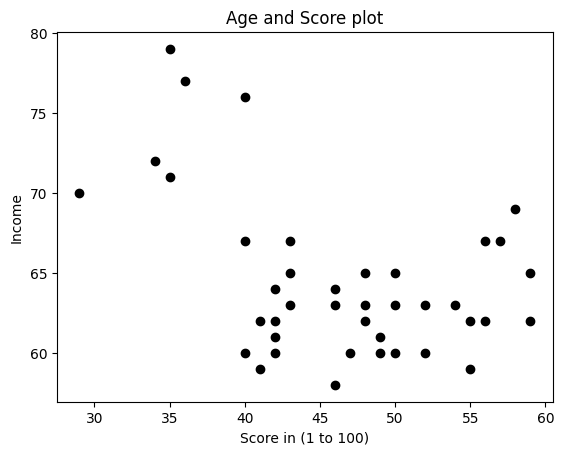

In [28]:
#income and score
plt.scatter(df0.score , df0.income, color='black')
plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

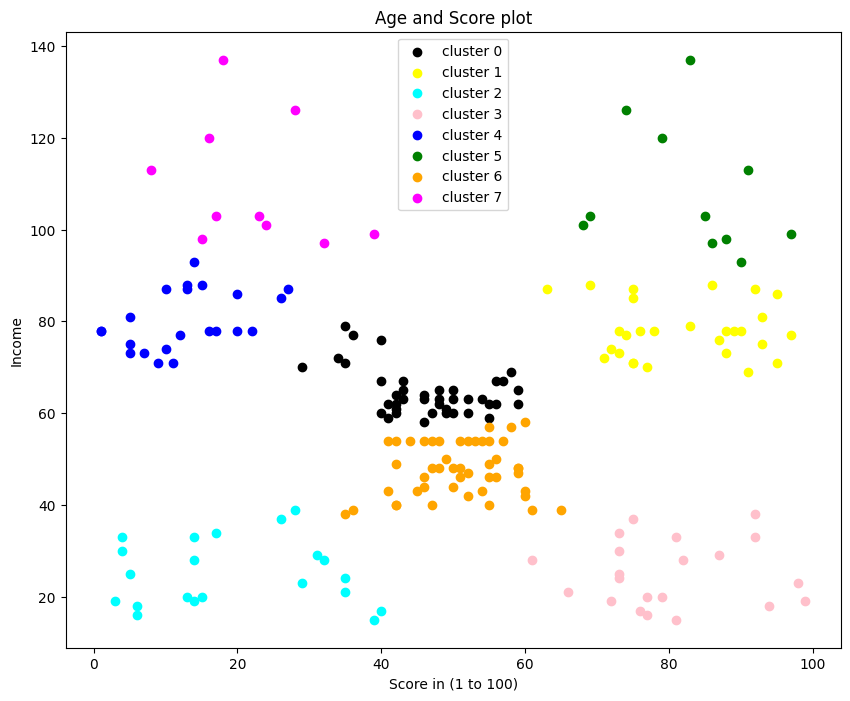

In [29]:
df0 = df[df.new_cluster1 == 0]
df1 = df[df.new_cluster1 == 1]
df2 = df[df.new_cluster1 == 2]
df3 = df[df.new_cluster1 == 3]
df4 = df[df.new_cluster1 == 4]
df5 = df[df.new_cluster1 == 5]
df6 = df[df.new_cluster1 == 6]
df7 = df[df.new_cluster1 == 7]

plt.figure(figsize=(10,8))

plt.scatter(df0.score , df0.income, color='black', label='cluster 0')
plt.scatter(df1.score , df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score , df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score , df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score , df4.income, color='blue', label='cluster 4')
plt.scatter(df5.score , df5.income, color='green', label='cluster 5')
plt.scatter(df6.score , df6.income, color='orange', label='cluster 6')
plt.scatter(df7.score , df7.income, color='magenta', label='cluster 7')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()

In [30]:
centrer1 = km.cluster_centers_
centrer1

array([[ 46.45      ,  64.45      ],
       [ 81.89285714,  78.03571429],
       [ 19.52380952,  25.14285714],
       [ 80.04761905,  25.0952381 ],
       [ 12.68181818,  80.18181818],
       [ 82.72727273, 108.18181818],
       [ 50.82978723,  47.72340426],
       [ 22.        , 109.7       ]])

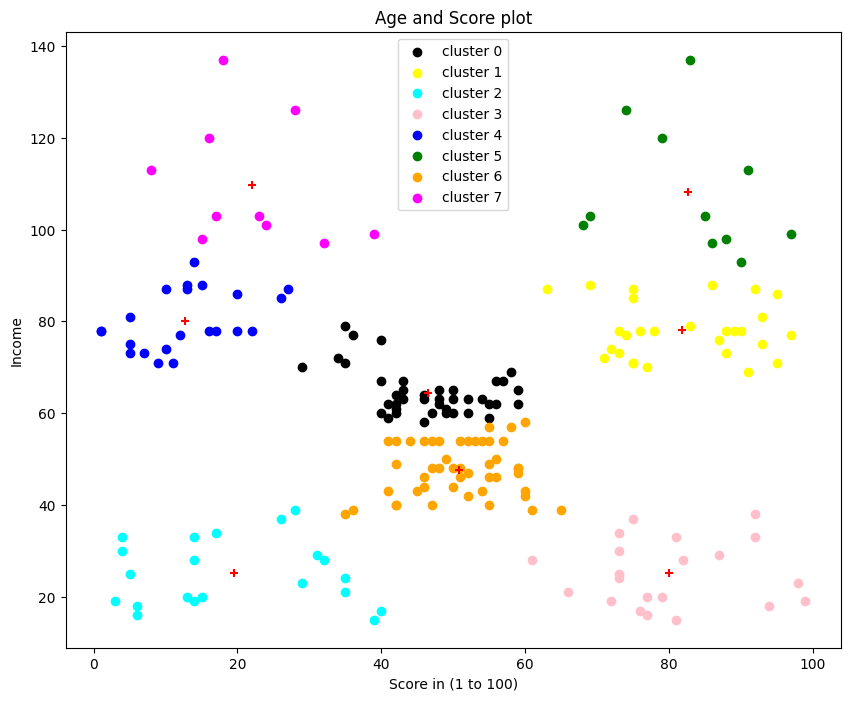

In [31]:
df0 = df[df.new_cluster1 == 0]
df1 = df[df.new_cluster1 == 1]
df2 = df[df.new_cluster1 == 2]
df3 = df[df.new_cluster1 == 3]
df4 = df[df.new_cluster1 == 4]
df5 = df[df.new_cluster1 == 5]
df6 = df[df.new_cluster1 == 6]
df7 = df[df.new_cluster1 == 7]

plt.figure(figsize=(10,8))

plt.scatter(df0.score , df0.income, color='black', label='cluster 0')
plt.scatter(df1.score , df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score , df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score , df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score , df4.income, color='blue', label='cluster 4')
plt.scatter(df5.score , df5.income, color='green', label='cluster 5')
plt.scatter(df6.score , df6.income, color='orange', label='cluster 6')
plt.scatter(df7.score , df7.income, color='magenta', label='cluster 7')

plt.scatter(centrer1[:,0], centrer1[:,1], color='red', marker='+')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()

# Optimizing K-Means

In [32]:
wcss = []
clusters_range = range(1,15)

for k in clusters_range:
    km2 = KMeans(n_clusters=k)
    km2.fit(df[['income', 'score']])
    wcss.append(km2.inertia_) # Inertia is the WCSS value


C:\Users\IT BD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\IT BD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\IT BD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\IT BD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [33]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25043.89004329005,
 21818.114588452183,
 19785.358930316994,
 18162.910830906443,
 15810.838613705502,
 14651.696354187818,
 13573.368025684365]

Text(0.5, 0, 'Clusters')

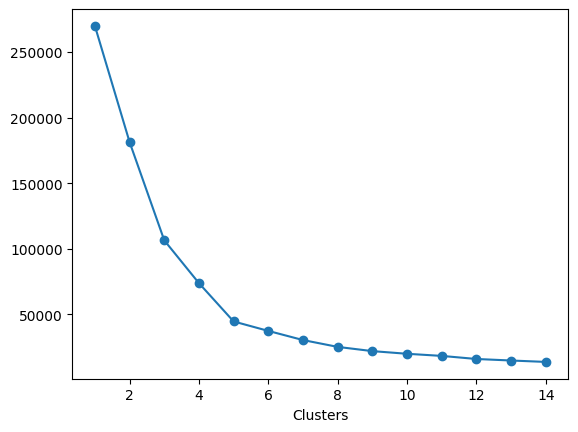

In [34]:
plt.plot(clusters_range, wcss, marker = 'o')
plt.xlabel('Clusters')

In [36]:
#Knee Locator

In [37]:
!pip install kneed

In [38]:
from kneed import KneeLocator
kn = KneeLocator(clusters_range, wcss, curve='convex', direction='decreasing')

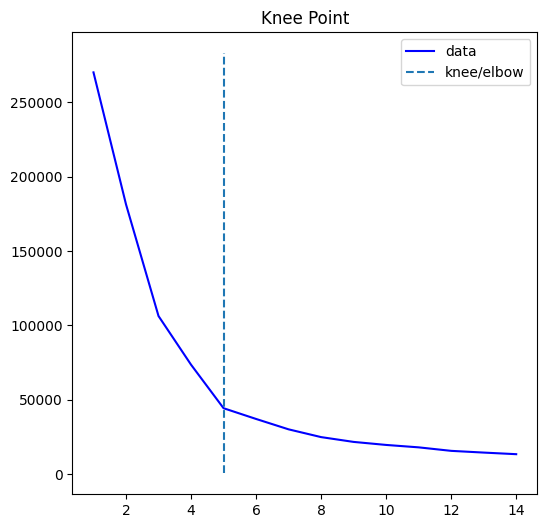

In [39]:
kn.plot_knee()

In [40]:
kn

In [41]:
kn.knee

5

# After Optimizing

In [42]:
km3 = KMeans(n_clusters=5) # creating kmeans object
km3.fit(df[['score', 'income']]) #fit() -> training the ml model

C:\Users\IT BD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\IT BD\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

In [43]:
df['optimize_clusters'] = km3.predict(df[['score', 'income']])
df.head()

,gender,age,income,score,new_cluster1,optimize_clusters
0,Male,19,15,39,2,0
1,Male,21,15,81,3,3
2,Female,20,16,6,2,0
3,Female,23,16,77,3,3
4,Female,31,17,40,2,0


In [44]:
centrer2 = km3.cluster_centers_
centrer2

array([[20.91304348, 26.30434783],
       [82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ]])

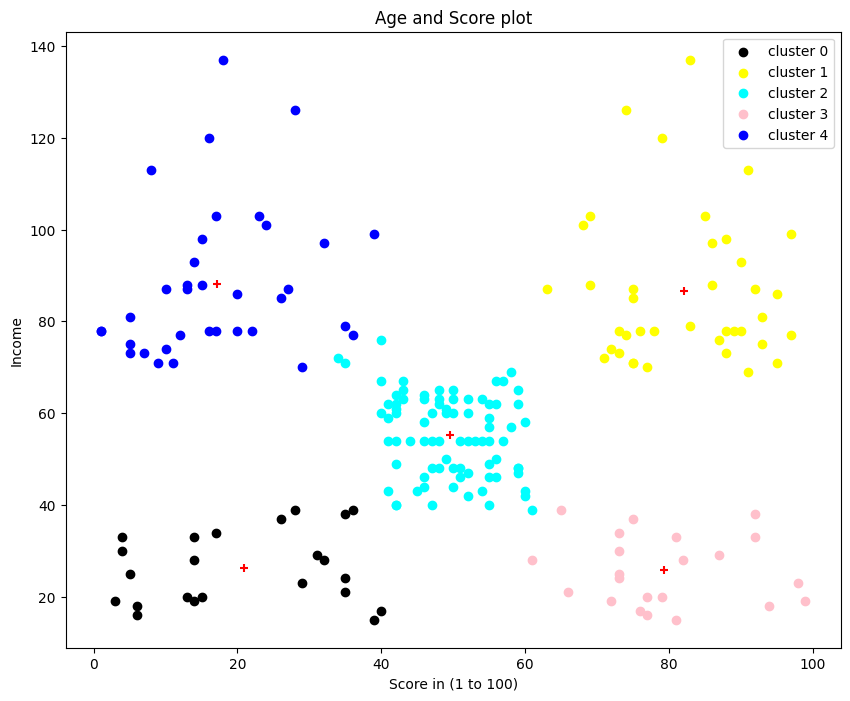

In [45]:
df0 = df[df.optimize_clusters == 0]
df1 = df[df.optimize_clusters == 1]
df2 = df[df.optimize_clusters == 2]
df3 = df[df.optimize_clusters == 3]
df4 = df[df.optimize_clusters == 4]

plt.figure(figsize=(10,8))

plt.scatter(df0.score , df0.income, color='black', label='cluster 0')
plt.scatter(df1.score , df1.income, color='yellow', label='cluster 1')
plt.scatter(df2.score , df2.income, color='cyan', label='cluster 2')
plt.scatter(df3.score , df3.income, color='pink', label='cluster 3')
plt.scatter(df4.score , df4.income, color='blue', label='cluster 4')

plt.scatter(centrer2[:,0], centrer2[:,1], color='red', marker='+')

plt.xlabel('Score in (1 to 100)')
plt.ylabel('Income')
plt.title('Age and Score plot')

plt.legend()
plt.show()